In [1]:
import pandas as pd
import nltk # national language tool kit
from konlpy.corpus import kolaw
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from wordcloud import WordCloud

t = Okt()

In [11]:
# 한글 폰트 문제 해결
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')  # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'  # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")


In [12]:
# Warning무시
import warnings
warnings.filterwarnings('ignore')


In [2]:
ballad_happy20 = pd.read_csv("../../Data/ballad_happy20.csv")
ballad_happy20.head()


,가수명,노래제목,발매일,가사,좋아요수
0,양다일,Darling,2020-11-23,Oh darling 처음 널 만나면 수줍은 대화들로 사랑에 빠질 거야 My darl...,10907
1,장범준,잠이 오질 않네요,2020-10-24,당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게...,159018
2,백아연,어디라도,2020-11-18,우연의 다른 이름은 운명이란 걸 배웠죠 우리 사랑의 끝이 없는 걸 이제서야 알았죠 ...,1622
3,김제훈,Love Again,2017-02-06,언제부터였을까 따뜻한 휴식을 찾고 있을 때 찾고 있을 때 그때부터였을까 맘이 포근해...,980
4,김제훈,잠잠,2020-03-17,오랜만에 거길 가봤어 아무도 없는 둘만이 알던 곳 함께 걷던 거리에 서서 아무 말도...,548


In [3]:
# 명사 분리
token_ko1 = t.nouns(ballad_happy20.loc[0,'가사'])

In [17]:
# 불용어 추가
# 실행해보면서 추가하면서 바꿔야함.
stop_words1 = ["때","눈","감","너","내","속","말","알","수","그","그게","부란","걸","널","손","골목","어귀","발","입","날"]
token_ko1 = [each_word for each_word in token_ko1 if each_word not in stop_words1]
# print(token_ko)

In [18]:
# 상위 50개 단어 확인
# 이걸보면서 불용어 지우는게 편해 전체는 힘들어
ko1 = nltk.Text(token_ko1)
ko1.vocab().most_common(50)

[('영원', 3),
 ('곁', 3),
 ('처음', 2),
 ('우린', 2),
 ('마주', 2),
 ('서로', 2),
 ('시간', 2),
 ('우리', 2),
 ('둘이서', 2),
 ('마음', 2),
 ('미소', 2),
 ('대화', 1),
 ('사랑', 1),
 ('잡고', 1),
 ('도시', 1),
 ('비', 1),
 ('어둠', 1),
 ('별빛', 1),
 ('아래', 1),
 ('음악', 1),
 ('취해', 1),
 ('품', 1),
 ('안고', 1),
 ('온기', 1),
 ('잠', 1),
 ('햇살', 1),
 ('가끔', 1),
 ('다른', 1),
 ('모습', 1),
 ('침묵', 1),
 ('오직', 1),
 ('둘', 1),
 ('순간', 1),
 ('고백', 1)]

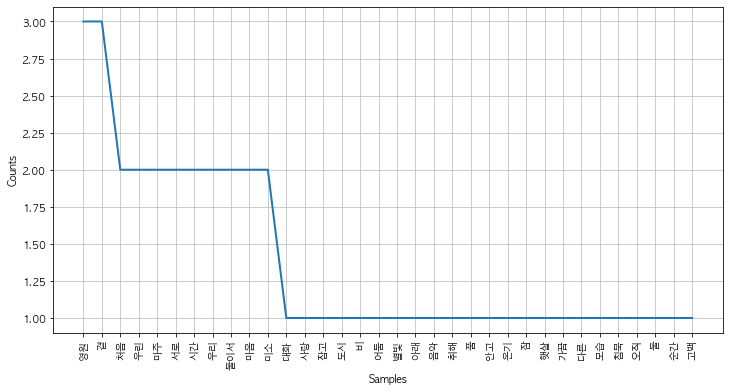

In [20]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko1.plot()
plt.show()

In [ ]:
# 상위 500개만 wordcloud로 그리기
# 구한데이터로 그리기
data = ko1.vocab().most_common(50)

# 딕셔너리로 만들기
tmp_data1 = dict(data)

wordcloud1 = WordCloud(
    background_color='White',
    relative_scaling=0.8,
    font_path="AppleGothic" # 윈도우 => 'c:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(tmp_data1)

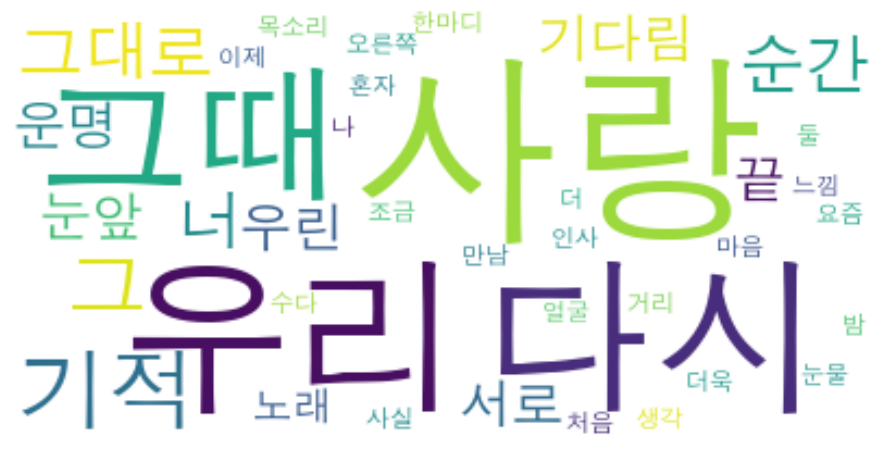

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()